In [1]:
#Initial imports
import sqlite3 as sql
import pandas as pd
import numpy as np

In [2]:
#Setup
database = "C:\\Users\\Nabiha Naqvie\\Documents\\SANA Project\\SANA.db"
connection = sql.connect(database)
cursor = connection.cursor()
cursor.execute("SELECT * FROM SANA")
results = cursor.fetchall()

In [3]:
sana = pd.read_sql_query("Select * FROM SANA", connection)
sana

,Title,Author,Category,Sub-Category,Language,External Links,Book/Paper,Abstract
0,Title of the paper,Author,Category,Tags/ Sub-category,Language,External link,Book/paper,Abstract
1,"Methods and Perspectives in Islamic Sciences, ...",Ali Paya,Islamic Philosophy,Islamic Studies/ Methodology and Methods in Is...,English,https://www.islamic-college.ac.uk/about/academ...,Book,None
2,"Ethics, Epistemology, and Religion: Further Th...",Ali Paya,Islamic Philosophy,Ethics/ Epistemology/Religion/Islam,English,https://www.routledge.com/search?kw=Ethics%2C+...,Book,None
3,Analytic Philosophy: Problems and Perspectives...,Ali Paya,Islamic Philosophy,Analytical Philosophy,Persian,https://www.islamic-college.ac.uk/about/academ...,Book,None
4,"On Religious Knowledge (Dar Bareh Ilm-e Dini),...",Ali Paya,Islamic Philosophy,Islamic Sciences/ Religious Knowledge,Persian,https://www.islamic-college.ac.uk/about/academ...,Book,None
...,...,...,...,...,...,...,...,...
637,The Origins and Rhetorical Evolution of the Te...,Shahzad Bashir,Anthropology of Shi’a Islam,historiography/Islamic history/qizilbash/Safav...,English,https://brill.com/view/journals/jesh/57/3/arti...,paper,This essay traces the use of the term Qizilb?s...
638,"Bashir, Shahzad Shah Ismaʿil and the Qizilbash...",Shahzad Bashir,Anthropology of Shi’a Islam,historiography/Islamic history/qizilbash/Safav...,English,https://www.journals.uchicago.edu/doi/10.1086/...,paper,The first decade of the sixteeth century of th...
639,The Iranian Metaphysicals: Explorations in Sci...,Alireza Doostdar,Anthropology of Shi’a Islam,science/spirituality/mysticism/rationality/met...,English,https://www-jstor-org.proxygw.wrlc.org/stable/...,paper,None
640,Varieties of Islamic Social Science KNOW: A Jo...,Alireza Doostdar,Anthropology of Shi’a Islam,social science/integration in Islam/Islamizati...,English,https://web-a-ebscohost-com.proxygw.wrlc.org/e...,paper,None


In [4]:
#Drop the unneccary columns 
sana = sana.drop([0])
sana.drop(['Author', 'Language', 'Book/Paper', 'External Links'], axis=1, inplace = True)
#Drop the rows with No abstract 
sana = sana.replace(to_replace='None', value=np.nan).dropna()

# Pre-Processing the Text 
## Cleaning, Tokenizing and Lemmatizing 
#### Includes creating binary values for category 

In [5]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Nabiha
[nltk_data]     Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nabiha Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Nabiha
[nltk_data]     Naqvie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#Create a function for pre-processing the important columns  
def preprocess(text):
    text = text.lower() #lowercase text
    text = text.strip()  #remove whitespace 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text) #Replace punctuation with space
    text = re.sub('\s+', ' ', text) #Remove extra space and tabs
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    return text

In [7]:
#Apply the function to each column 
sana['Sub-Category'] = sana['Sub-Category'].apply(preprocess)
sana['Abstract'] = sana['Abstract'].apply(preprocess)
sana['Title'] = sana['Title'].apply(preprocess)
sana['Category'] = sana['Category'].apply(preprocess)

In [8]:
#Create function for stop words
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [9]:
#Apply the function for stop words to each column 
sana['Category'] = sana['Category'].apply(stopword)
sana['Title'] = sana['Title'].apply(stopword)
sana['Sub-Category'] = sana['Sub-Category'].apply(stopword)
sana['Abstract'] = sana['Abstract'].apply(stopword)


In [10]:
#Create a function to tokenize all columns 
sana["AbstractToken"] = sana.apply(lambda row: word_tokenize(row["Abstract"]), axis=1)
sana["Sub-CategoryToken"] = sana.apply(lambda row: word_tokenize(row["Sub-Category"]), axis=1)
sana["TitleToken"] = sana.apply(lambda row: word_tokenize(row["Title"]), axis=1)

In [11]:
#Create a function to lemmatize all columns 
WNL = WordNetLemmatizer()
def lemmatize_text(text):
    return [WNL.lemmatize(w) for w in text]


In [12]:
#Apply the function for lemmatize to all columns 
sana["AbstractToken"] = sana['AbstractToken'].apply(lemmatize_text)
sana["AbstractL"] = sana['AbstractToken'].apply(' '.join)
sana["Sub-CategoryToken"] = sana['Sub-CategoryToken'].apply(lemmatize_text)
sana["Sub-CategoryL"] = sana['Sub-CategoryToken'].apply(' '.join)
sana["TitleToken"] = sana['TitleToken'].apply(lemmatize_text)
sana["TitleL"] = sana['TitleToken'].apply(' '.join)

In [13]:
#look at all the results 
sana

,Title,Category,Sub-Category,Abstract,AbstractToken,Sub-CategoryToken,TitleToken,AbstractL,Sub-CategoryL,TitleL
8,islam modernity new millennium themes critical...,islamic philosophy,religious studies islamic studies philosophy r...,world becomes increasingly globalised islam fa...,"[world, becomes, increasingly, globalised, isl...","[religious, study, islamic, study, philosophy,...","[islam, modernity, new, millennium, theme, cri...",world becomes increasingly globalised islam fa...,religious study islamic study philosophy relig...,islam modernity new millennium theme critical ...
12,analytic philosophy perspective critical ratio...,islamic philosophy,analytical philosophy critical rationalism,present paper attempt explore impact karl popp...,"[present, paper, attempt, explore, impact, kar...","[analytical, philosophy, critical, rationalism]","[analytic, philosophy, perspective, critical, ...",present paper attempt explore impact karl popp...,analytical philosophy critical rationalism,analytic philosophy perspective critical ratio...
15,misty land ideas light dialogue anthology comp...,islamic philosophy,islamic philosophy philosophy comparative,comparative philosophy like types philosophy s...,"[comparative, philosophy, like, type, philosop...","[islamic, philosophy, philosophy, comparative]","[misty, land, idea, light, dialogue, anthology...",comparative philosophy like type philosophy so...,islamic philosophy philosophy comparative,misty land idea light dialogue anthology compa...
16,socio ethical consequences convergent technolo...,islamic philosophy,socio ethical consequences converging sciences...,critical assessment social changes impact fact...,"[critical, assessment, social, change, impact,...","[socio, ethical, consequence, converging, scie...","[socio, ethical, consequence, convergent, tech...",critical assessment social change impact facto...,socio ethical consequence converging science t...,socio ethical consequence convergent technolog...
29,shias britain earliest cases part 1 journal sh...,islamic philosophy,shi muslim counterflows colonialism east india...,shia muslims uk whether individually groups co...,"[shia, muslim, uk, whether, individually, grou...","[shi, muslim, counterflows, colonialism, east,...","[shia, britain, earliest, case, part, 1, journ...",shia muslim uk whether individually group comm...,shi muslim counterflows colonialism east india...,shia britain earliest case part 1 journal shia...
...,...,...,...,...,...,...,...,...,...,...
635,bashir shahzad reading self persian prose poet...,anthropology shia islam,sufism persian poetry historiography 17th cent...,let us start thought experiment five hundred y...,"[let, u, start, thought, experiment, five, hun...","[sufism, persian, poetry, historiography, 17th...","[bashir, shahzad, reading, self, persian, pros...",let u start thought experiment five hundred ye...,sufism persian poetry historiography 17th cent...,bashir shahzad reading self persian prose poet...
636,everlasting doubt uncertainty islamic represen...,anthropology shia islam,historiography islamic history persian arabic ...,utilizing treatments uncertainty regarding his...,"[utilizing, treatment, uncertainty, regarding,...","[historiography, islamic, history, persian, ar...","[everlasting, doubt, uncertainty, islamic, rep...",utilizing treatment uncertainty regarding hist...,historiography islamic history persian arabic ...,everlasting doubt uncertainty islamic represen...
637,origins rhetorical evolution term qizilbāsh pe...,anthropology shia islam,historiography islamic history qizilbash safav...,essay traces use term qizilb sh select literat...,"[essay, trace, use, term, qizilb, sh, select, ...","[historiography, islamic, history, qizilbash, ...","[origin, rhetorical, evolution, term, qizilbās...",essay trace use term qizilb sh select literatu...,historiography islamic history qizilbash safav...,origin rhetorical evolution term qizilbāsh per...
638,bashir shahzad shah ismaʿil qizilb

In [14]:
#Drop the unneccasary columns
sana.drop(['AbstractToken', 'Sub-CategoryToken', 'TitleToken'], axis=1, inplace = True)
sana

,Title,Category,Sub-Category,Abstract,AbstractL,Sub-CategoryL,TitleL
8,islam modernity new millennium themes critical...,islamic philosophy,religious studies islamic studies philosophy r...,world becomes increasingly globalised islam fa...,world becomes increasingly globalised islam fa...,religious study islamic study philosophy relig...,islam modernity new millennium theme critical ...
12,analytic philosophy perspective critical ratio...,islamic philosophy,analytical philosophy critical rationalism,present paper attempt explore impact karl popp...,present paper attempt explore impact karl popp...,analytical philosophy critical rationalism,analytic philosophy perspective critical ratio...
15,misty land ideas light dialogue anthology comp...,islamic philosophy,islamic philosophy philosophy comparative,comparative philosophy like types philosophy s...,comparative philosophy like type philosophy so...,islamic philosophy philosophy comparative,misty land idea light dialogue anthology compa...
16,socio ethical consequences convergent technolo...,islamic philosophy,socio ethical consequences converging sciences...,critical assessment social changes impact fact...,critical assessment social change impact facto...,socio ethical consequence converging science t...,socio ethical consequence convergent technolog...
29,shias britain earliest cases part 1 journal sh...,islamic philosophy,shi muslim counterflows colonialism east india...,shia muslims uk whether individually groups co...,shia muslim uk whether individually group comm...,shi muslim counterflows colonialism east india...,shia britain earliest case part 1 journal shia...
...,...,...,...,...,...,...,...
635,bashir shahzad reading self persian prose poet...,anthropology shia islam,sufism persian poetry historiography 17th cent...,let us start thought experiment five hundred y...,let u start thought experiment five hundred ye...,sufism persian poetry historiography 17th cent...,bashir shahzad reading self persian prose poet...
636,everlasting doubt uncertainty islamic represen...,anthropology shia islam,historiography islamic history persian arabic ...,utilizing treatments uncertainty regarding his...,utilizing treatment uncertainty regarding hist...,historiography islamic history persian arabic ...,everlasting doubt uncertainty islamic represen...
637,origins rhetorical evolution term qizilbāsh pe...,anthropology shia islam,historiography islamic history qizilbash safav...,essay traces use term qizilb sh select literat...,essay trace use term qizilb sh select literatu...,historiography islamic history qizilbash safav...,origin rhetorical evolution term qizilbāsh per...
638,bashir shahzad shah ismaʿil qizilbash cannibal...,anthropology shia islam,historiography islamic history qizilbash safav...,first decade sixteeth century common era saw t...,first decade sixteeth century common era saw t...,historiography islamic history qizilbash safav...,bashir shahzad shah ismaʿil qizilbash cannibal...


In [15]:
#Reset the indexes 
sana.reset_index(inplace = True)
sana.drop(['index'], axis=1, inplace = True)

In [16]:
#Create numerical column for category 
sana['Category'].value_counts()
category = {'anthropology shia islam': 0, 'islamic philosophy': 1}
sana['Category'] = [category[item] for item in sana['Category']]
sana

,Title,Category,Sub-Category,Abstract,AbstractL,Sub-CategoryL,TitleL
0,islam modernity new millennium themes critical...,1,religious studies islamic studies philosophy r...,world becomes increasingly globalised islam fa...,world becomes increasingly globalised islam fa...,religious study islamic study philosophy relig...,islam modernity new millennium theme critical ...
1,analytic philosophy perspective critical ratio...,1,analytical philosophy critical rationalism,present paper attempt explore impact karl popp...,present paper attempt explore impact karl popp...,analytical philosophy critical rationalism,analytic philosophy perspective critical ratio...
2,misty land ideas light dialogue anthology comp...,1,islamic philosophy philosophy comparative,comparative philosophy like types philosophy s...,comparative philosophy like type philosophy so...,islamic philosophy philosophy comparative,misty land idea light dialogue anthology compa...
3,socio ethical consequences convergent technolo...,1,socio ethical consequences converging sciences...,critical assessment social changes impact fact...,critical assessment social change impact facto...,socio ethical consequence converging science t...,socio ethical consequence convergent technolog...
4,shias britain earliest cases part 1 journal sh...,1,shi muslim counterflows colonialism east india...,shia muslims uk whether individually groups co...,shia muslim uk whether individually group comm...,shi muslim counterflows colonialism east india...,shia britain earliest case part 1 journal shia...
...,...,...,...,...,...,...,...
193,bashir shahzad reading self persian prose poet...,0,sufism persian poetry historiography 17th cent...,let us start thought experiment five hundred y...,let u start thought experiment five hundred ye...,sufism persian poetry historiography 17th cent...,bashir shahzad reading self persian prose poet...
194,everlasting doubt uncertainty islamic represen...,0,historiography islamic history persian arabic ...,utilizing treatments uncertainty regarding his...,utilizing treatment uncertainty regarding hist...,historiography islamic history persian arabic ...,everlasting doubt uncertainty islamic represen...
195,origins rhetorical evolution term qizilbāsh pe...,0,historiography islamic history qizilbash safav...,essay traces use term qizilb sh select literat...,essay trace use term qizilb sh select literatu...,historiography islamic history qizilbash safav...,origin rhetorical evolution term qizilbāsh per...
196,bashir shahzad shah ismaʿil qizilbash cannibal...,0,historiography islamic history qizilbash safav...,first decade sixteeth century common era saw t...,first decade sixteeth century common era saw t...,historiography islamic history qizilbash safav...,bashir shahzad shah ismaʿil qizilbash cannibal...


# Vectorizing Data 
#### Importing for ML 

In [17]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

###### CountVectorize

In [19]:
#Vectorize the Abstract 
#The results for counts.shape give a tuple that indicate 198 abstract that have 4974 unique words 
count_vect = CountVectorizer()
Xa_counts = count_vect.fit_transform(sana['AbstractL'])
print(Xa_counts.shape)
print(count_vect.get_feature_names())

(198, 4974)
['000', '100', '1000', '1010', '1021', '1088', '10th', '1111', '1164', '1171', '11th', '1210', '1274', '12th', '12thcenturyce', '1334', '135', '1350', '1370', '1382', '1389', '1390', '1392', '1394', '1399', '13th', '14', '1405', '1406', '1409', '1413', '1414', '1418', '1423', '1426', '1432', '1433', '1447', '1449', '1454', '1460s', '1464', '1469', '1488', '1490', '14901540ce', '14th', '150', '1501', '1502', '15121520', '15181687', '15201566', '1524', '1534', '157', '1587', '1592', '15th', '16', '1626', '1629', '163', '1642', '16th', '1700', '175', '18', '1835', '1867', '1882', '1899', '19', '1903', '1909', '1940s', '1950s', '1955das', '1960s', '1970s', '1975', '1976', '1978', '1979', '19791989', '1980s', '1982', '1989', '19892005', '1990s', '1991', '1992', '1993', '1995', '1996', '1997', '1998', '1from', '1the', '1two', '20', '200', '2003', '2005', '20052013', '2006', '2007', '2009', '2010', '2011', '2016', '2017', '2018', '2025', '20th', '21', '22', '25', '25b', '28', '298

In [20]:
Xa_counts

<198x4974 sparse matrix of type '<class 'numpy.int64'>'
	with 13496 stored elements in Compressed Sparse Row format>

In [21]:
#Putting the result above into the dataframe 
Xa_counts_df = pd.DataFrame(X_counts.toarray())
Xa_counts_df

,0,1,2,3,4,5,6,7,8,9,...,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#The results here show the same table as above except here it has columns names 
Xa_counts_df.columns = count_vect.get_feature_names()
Xa_counts_df

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,1010,1021,1088,10th,1111,1164,1171,...,zahras,zana,zaydis,zaynab,zbek,zeal,zero,ziya,zo,zul
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### N-Grams for TFIDF 

In [34]:
#Looking for 
ngram_vect = CountVectorizer(ngram_range = (3,3))
X_counts = ngram_vect.fit_transform(sana['AbstractL'])
print(X_counts)


  (0, 15473)	1
  (0, 1697)	1
  (0, 6514)	1
  (0, 5600)	1
  (0, 7088)	1
  (0, 4863)	1
  (0, 6430)	1
  (0, 2304)	1
  (0, 12453)	1
  (0, 8708)	1
  (0, 7928)	1
  (0, 3248)	1
  (0, 10635)	1
  (0, 11798)	1
  (0, 14407)	1
  (0, 4578)	1
  (0, 9447)	1
  (0, 13765)	1
  (0, 13150)	1
  (0, 1833)	1
  (0, 14923)	1
  (0, 3161)	1
  (0, 11200)	1
  (0, 15095)	1
  (0, 6283)	1
  :	:
  (197, 2948)	1
  (197, 10834)	1
  (197, 12350)	1
  (197, 14918)	1
  (197, 3793)	1
  (197, 8848)	1
  (197, 13476)	1
  (197, 1004)	1
  (197, 1389)	1
  (197, 7414)	1
  (197, 10674)	1
  (197, 3963)	1
  (197, 704)	1
  (197, 686)	1
  (197, 14739)	1
  (197, 12294)	1
  (197, 10575)	1
  (197, 8735)	1
  (197, 8769)	1
  (197, 13620)	1
  (197, 11388)	1
  (197, 12481)	1
  (197, 255)	1
  (197, 8032)	1
  (197, 2973)	1


In [35]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df

,000 participant bahrain,100 000 participant,1000 1592 ce,1010 maw il,1021 powerful ruler,1088 introducing ir,1088 renowned ism,10th century draw,10th century eventually,10th century missionary,...,zaynab though sayyida,zaynab twelver shiis,zaynab well analyze,zbek activity twelver,zbek khan golden,zeal individ uals,zero sum game,ziya battle standard,zo state exception,zul qarneyn work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Applying TFIDF Vectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sana['AbstractL'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(198, 4974)
['000', '100', '1000', '1010', '1021', '1088', '10th', '1111', '1164', '1171', '11th', '1210', '1274', '12th', '12thcenturyce', '1334', '135', '1350', '1370', '1382', '1389', '1390', '1392', '1394', '1399', '13th', '14', '1405', '1406', '1409', '1413', '1414', '1418', '1423', '1426', '1432', '1433', '1447', '1449', '1454', '1460s', '1464', '1469', '1488', '1490', '14901540ce', '14th', '150', '1501', '1502', '15121520', '15181687', '15201566', '1524', '1534', '157', '1587', '1592', '15th', '16', '1626', '1629', '163', '1642', '16th', '1700', '175', '18', '1835', '1867', '1882', '1899', '19', '1903', '1909', '1940s', '1950s', '1955das', '1960s', '1970s', '1975', '1976', '1978', '1979', '19791989', '1980s', '1982', '1989', '19892005', '1990s', '1991', '1992', '1993', '1995', '1996', '1997', '1998', '1from', '1the', '1two', '20', '200', '2003', '2005', '20052013', '2006', '2007', '2009', '2010', '2011', '2016', '2017', '2018', '2025', '20th', '21', '22', '25', '25b', '28', '298

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,000,100,1000,1010,1021,1088,10th,1111,1164,1171,...,zahras,zana,zaydis,zaynab,zbek,zeal,zero,ziya,zo,zul
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering: Feature Creation 

In [38]:
sanaC = sana[['TitleL','AbstractL']]
sana['AbstractL_len'] = sana['AbstractL'].apply(lambda x : len(x) - x.count(" "))
sana['AbstractL_len']

0      649
1      423
2      524
3      782
4      881
      ... 
193    694
194    629
195    374
196    304
197    560
Name: AbstractL_len, Length: 198, dtype: int64

In [39]:
sana['TitleL_len'] = sana['TitleL'].apply(lambda x : len(x) - x.count(" "))
sana['TitleL_len']

0       89
1      145
2      196
3      113
4      157
      ... 
193    104
194    119
195    139
196    119
197     84
Name: TitleL_len, Length: 198, dtype: int64

#### Evaluate the created features

In [40]:
from matplotlib import pyplot 
import numpy as np
%matplotlib inline 

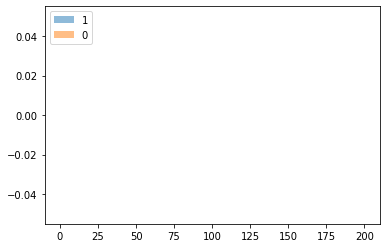

In [46]:
bins = np.linspace(0,200,40)
pyplot.hist(sana[sana['Category']=='1']['AbstractL_len'], bins, alpha = 0.5, label = '1')
pyplot.hist(sana[sana['Category']=='0']['AbstractL_len'], bins, alpha = 0.5, label = '0')
pyplot.legend(loc='upper left')
pyplot.show()

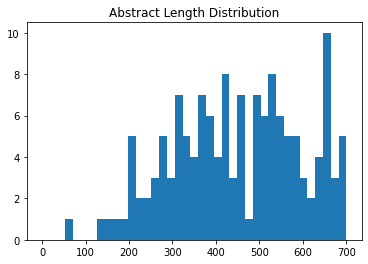

In [47]:
bins = np.linspace (0,700,40)
pyplot.hist(sana['AbstractL_len'],bins)
pyplot.title("Abstract Length Distribution")
pyplot.show()

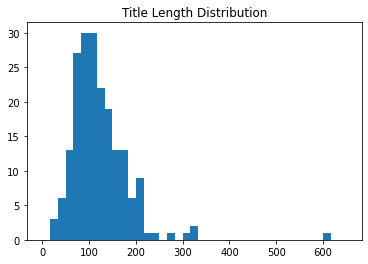

In [48]:
bins = np.linspace (0,650,40)
pyplot.hist(sana['TitleL_len'],bins)
pyplot.title("Title Length Distribution")
pyplot.show()

### Machine Learning Classifiers 

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [51]:
#Create the vectore form 
tdfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sana['AbstractL'])

X_features = pd.concat([sana['AbstractL_len'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

#Apply the RDF Classifier 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)

cross_val_score(rf,X_features, sana['Category'], cv=k_fold, scoring='accuracy', n_jobs=-1)


array([0.        , 0.425     , 1.        , 1.        , 0.97435897])

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_features, sana['Category'], test_size=0.2)
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [56]:
sorted(zip(rf_model.feature_importances_,X_train.columns), reverse= True)[0:10]

[(0.028427282105715667, 2350),
 (0.011702483948870418, 4099),
 (0.011143712008139097, 3259),
 (0.011031316089444123, 1120),
 (0.010720936733675612, 3355),
 (0.010212685935113007, 4757),
 (0.009932525574568841, 2757),
 (0.009869671935509939, 1830),
 (0.00975680332279733, 4008),
 (0.009488447900213077, 2402)]

In [62]:
y_pred = rf_model.predict(X_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label = 1, average='binary')

D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [63]:
import math
print('Precision:{}/Recall:{}/Accuracy:{}'.format(round(precision,3), round(recall,3), round((y_pred==y_test).sum() / len(y_pred),3)))

Precision:1.0/Recall:0.5/Accuracy:0.85


In [20]:
from sklearn import linear_model
#Implement TF-IDF for binary model
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,7), analyzer='char')
X = tfidf.fit_transform(sana['AbstractL'])
Y = sana['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
LR.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

TF-IDF Abstract



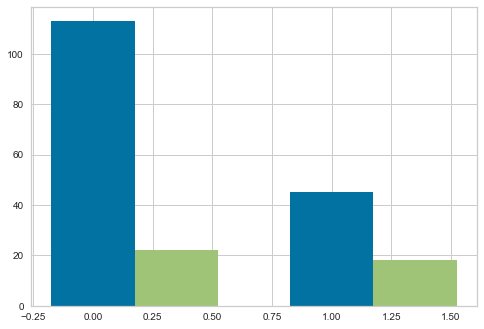

Binary Logistic Model Score for TF-IDF: 55.0 % 



D:\Anaconda 2\envs\SANA\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


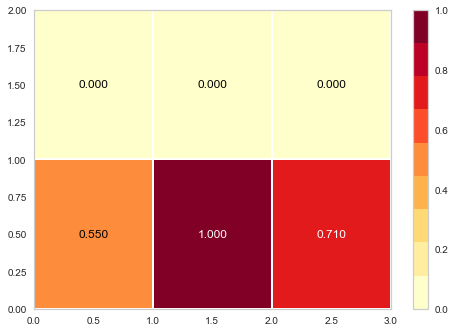

In [21]:
from yellowbrick.target import ClassBalance
import matplotlib.pyplot as plt
#Class Balance Visualization
CB = ClassBalance()
CB.fit(Y_train, Y_test)
print('TF-IDF Abstract\n')
plt.show()
from yellowbrick.classifier import ClassificationReport
#Classification Report and overall score for Logistics Regression
LRScore = round((LR.score(X_test, Y_test))*100,2)
print('Binary Logistic Model Score for TF-IDF:',LRScore,'%','\n')
LRC = ClassificationReport(LR, support=False)
LRC.fit(X_train, Y_train)      
LRC.score(X_test, Y_test)
plt.show()

In [22]:
from sklearn import linear_model
#Implement TF-IDF for binary model
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,7), analyzer='char')
X = tfidf.fit_transform(sana['TitleL'])
Y = sana['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #Split into 80/20 train and test sets

#Run binary logistic regression
LR = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
LR.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

TF-IDF Title



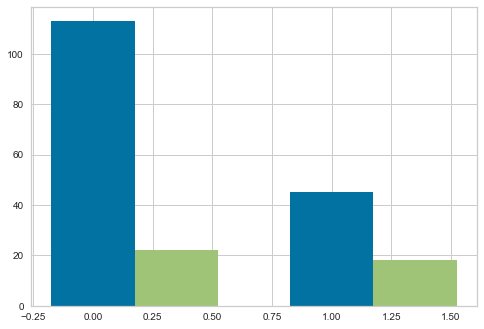

Title Logistic Model Score for TF-IDF: 67.5 % 



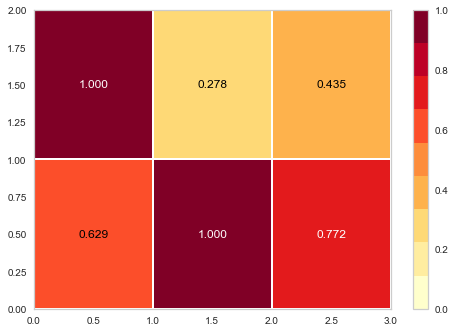

In [23]:
from yellowbrick.target import ClassBalance
import matplotlib.pyplot as plt
#Class Balance Visualization
CB = ClassBalance()
CB.fit(Y_train, Y_test)
print('TF-IDF Title\n')
plt.show()
from yellowbrick.classifier import ClassificationReport
#Classification Report and overall score for Logistics Regression
LRScore = round((LR.score(X_test, Y_test))*100,2)
print('Title Logistic Model Score for TF-IDF:',LRScore,'%','\n')
LRC = ClassificationReport(LR, support=False)
LRC.fit(X_train, Y_train)      
LRC.score(X_test, Y_test)
plt.show()